In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<a href="https://colab.research.google.com/github/EngineerYoutuber/First_repository/blob/main/Diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
df=pd.read_csv("dataset.csv")

In [7]:
df.head(25000)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
24995,1.54,Ideal,G,VS2,60.2,59.0,13508,7.47,7.52,4.51
24996,2.20,Ideal,I,SI2,62.2,56.0,13512,8.33,8.29,5.17
24997,1.50,Premium,E,VS1,60.1,60.0,13513,7.42,7.48,4.48
24998,1.51,Good,G,VS1,62.4,59.0,13515,7.25,7.28,4.53


In [8]:
df.shape

(53940, 10)

In [9]:
df['Cut(Quality)'].value_counts()

Cut(Quality)
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [10]:
max(df['Price(in US dollars)'])

18823

Exploratory Data Analysis

<Axes: xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

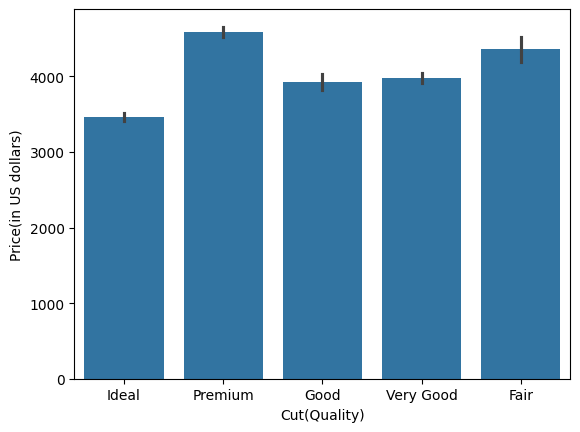

In [11]:
sns.barplot(data=df,x=df['Cut(Quality)'],y=df['Price(in US dollars)'])

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

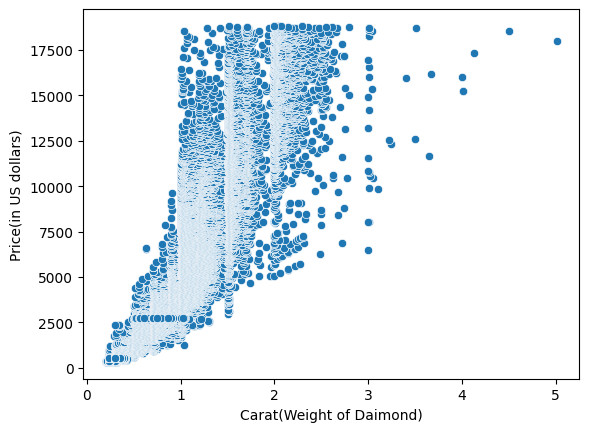

In [12]:
sns.scatterplot(data=df,x='Carat(Weight of Daimond)',y='Price(in US dollars)')

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

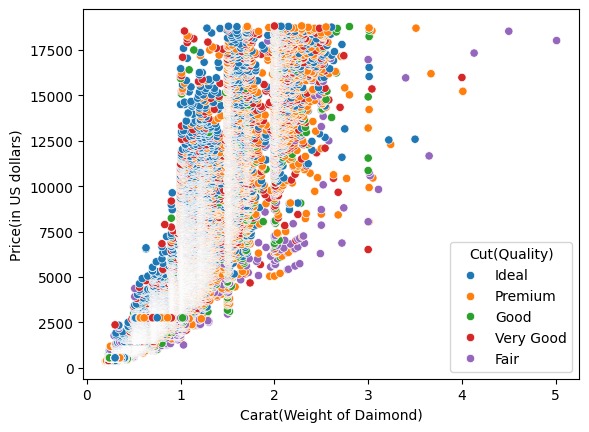

In [13]:
sns.scatterplot(data=df,x='Carat(Weight of Daimond)',y='Price(in US dollars)',hue='Cut(Quality)')

In [14]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

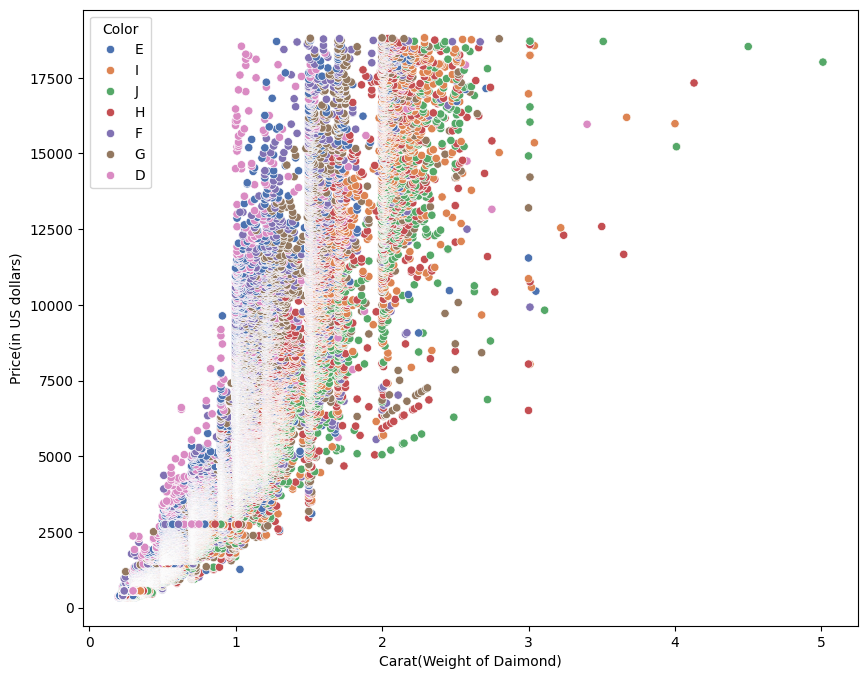

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Carat(Weight of Daimond)',y='Price(in US dollars)',hue='Color',palette='deep')

<Axes: xlabel='Color', ylabel='Price(in US dollars)'>

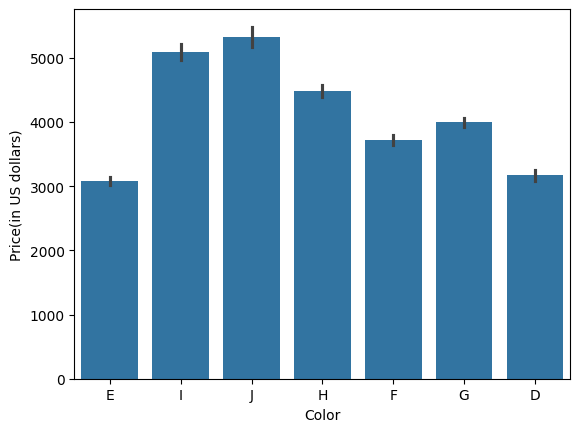

In [16]:
sns.barplot(data=df,x=df['Color'],y=df['Price(in US dollars)'])

In [17]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<Axes: xlabel='Clarity', ylabel='Price(in US dollars)'>

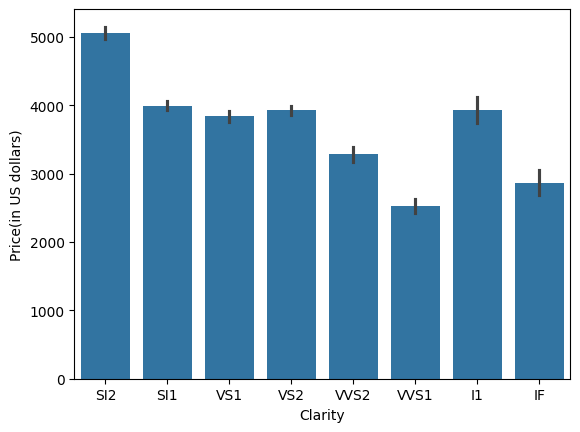

In [18]:
sns.barplot(data=df,x=df['Clarity'],y=df['Price(in US dollars)'])

Data Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
from sklearn import preprocessing

In [21]:
le=preprocessing.LabelEncoder()

In [22]:
df['Cut(Quality)']=le.fit_transform(df['Cut(Quality)'])

In [23]:
df['Cut(Quality)'].unique()

array([2, 3, 1, 4, 0])

In [24]:
df['Color']=le.fit_transform(df['Color'])

In [25]:
df['Color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [26]:
df['Clarity']=le.fit_transform(df['Clarity'])

In [27]:
df['Clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [28]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Machine Learning Model Building

In [29]:
x=df.drop('Price(in US dollars)',axis=1)

In [30]:
y=df['Price(in US dollars)']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=2)

Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
rf=RandomForestRegressor()
rf.fit(x_tr,y_tr)

RandomForestRegressor()

In [35]:
y_pred=rf.predict(x_ts)

In [36]:
mae=mean_absolute_error(y_ts,y_pred)
mse=mean_squared_error(y_ts,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_ts,y_pred)
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)
print("root_mean_squared_error :",rmse)
print("r2_score :",r2)

mean_absolute_error : 270.59644423367234
mean_squared_error : 294681.86463970353
root_mean_squared_error : 542.8460782208006
r2_score : 0.9813791795494861
